In [1]:
#z5611048 Samyak Diwan classification part 
# header files and reading our data
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from scipy import stats # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from tensorflow.keras import regularizers # type: ignore
from tensorflow.keras.regularizers import l2 # type: ignore
from tensorflow.keras.models import load_model # type: ignore # type: ignoreimport tensorflow as tf
from sklearn.preprocessing import StandardScaler # type: ignore
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense , Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import confusion_matrix, balanced_accuracy_score, precision_score

data = pd.read_csv('Climate_SPI.csv') # our data as given in assignment spec on moddle


In [2]:
data['Drought'] = data['SPI'].apply(lambda x:1 if x<=1 else 0)  #Converting SPI values into a binary classification target 

In [3]:
X = data.drop(columns=['year','grid_ID','SPI','Drought'])
y = data['Drought']  


In [4]:
# 3(b) splitting the data

X_train, X_comb, y_train, y_comb = train_test_split(X,y,test_size = 0.3, random_state = 42) #training set is 70% & combination set is 30%
X_val, X_test, y_val, y_test = train_test_split(X_comb, y_comb, test_size=0.5, random_state=42)# validation&testing given 15% each ( splitting the combination set)

In [5]:
# 3(c) Data pre-processing 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Converting month to numeric
data['month'] = pd.to_numeric(data['month'], errors='coerce').copy()

# Filling NaN values (for standard data pre processing just in-case )
data['month'] = data['month'].fillna(1).astype(int)

# 3.4 Additionally done altho we havent used month as a predictor here
data['month_normalised'] = 2 * np.pi * (data['month'] - 1) / 12
data['month_cos'] = np.cos(data['month_normalised'])
data['month_sin'] = np.sin(data['month_normalised'])

# Dropping month column
data = data.drop(columns=['month'])



In [6]:

early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)
# # Compute class weights
# class_weights_array = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=data['Drought'])

# # Convert array to dictionary
# class_weights = {0: class_weights_array[0], 1: class_weights_array[1]}

model = Sequential([
    Dense(32, activation='relu', input_shape=(13,), kernel_regularizer=  regularizers.l2(0.001) ),  # First hidden layer with 64 neurons
    Dropout(0.4),
    Dense(16, activation='relu'),  # Second hidden layer with 32 neurons
    Dropout(0.4),
    Dense(1, activation='sigmoid')  
])
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# print(model.summary())



C:\Users\Samayak\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [116]:
#3(e)
run = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])


Epoch 1/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7255 - loss: 0.5812 - val_accuracy: 0.8320 - val_loss: 0.4019
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8350 - loss: 0.4230 - val_accuracy: 0.8302 - val_loss: 0.3756
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8368 - loss: 0.4044 - val_accuracy: 0.8311 - val_loss: 0.3645
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8383 - loss: 0.3955 - val_accuracy: 0.8338 - val_loss: 0.3578
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8314 - loss: 0.3920 - val_accuracy: 0.8364 - val_loss: 0.3534
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8419 - loss: 0.3678 - val_accuracy: 0.8430 - val_loss: 0.3481
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8447 - loss: 0.3706 - val_accuracy: 0.8395 - val_loss: 0.3456
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8491 - loss: 0.3711 - val_accuracy: 0.

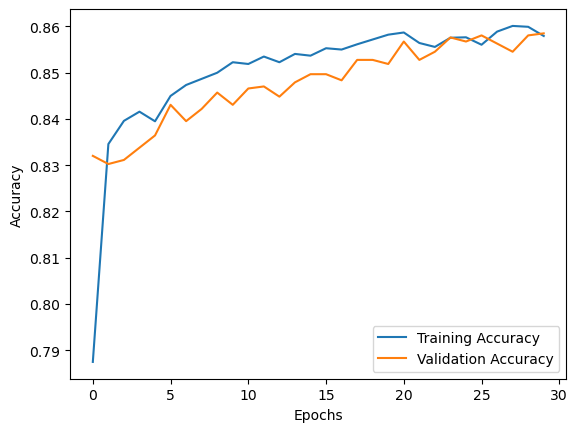

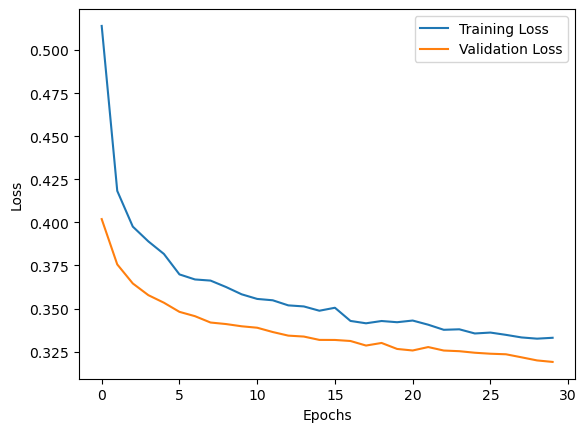

In [117]:
# 3.1 (f)
# Plot Accuracy
plt.plot(run.history['accuracy'], label='Training Accuracy')
plt.plot(run.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(run.history['loss'], label='Training Loss')
plt.plot(run.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [118]:
#3.2 (h)
# Subset 1: Temperature related variables
X_sub_1 = X[['mn2t', 'mx2t', 't', 't2']]
X_train_1, X_val_1, X_test_1 = X_train[['mn2t', 'mx2t', 't', 't2']], X_val[['mn2t', 'mx2t', 't', 't2']], X_test[['mn2t', 'mx2t', 't', 't2']]

# Subset 3: Pressure and humidity related variables
X_sub_3 = X[['msl', 'q', 'tcc', 'z']]
X_train_3, X_val_3, X_test_3 = X_train[['msl', 'q', 'tcc', 'z']], X_val[['msl', 'q', 'tcc', 'z']], X_test[['msl', 'q', 'tcc', 'z']]

# Subset 4: Random Variables 1
X_sub_4 = X[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10']]
X_train_4, X_val_4, X_test_4 = X_train[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10']], X_val[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10']], X_test[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10']]

# Subset 5: Random Variables 2
X_sub_5 = X[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10', 'msl']]
X_train_5, X_val_5, X_test_5 = X_train[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10', 'msl']], X_val[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10', 'msl']], X_test[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10', 'msl']]

# Subset 6: 3Random Variables 1
X_sub_6 = X[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10', 'msl', 'tcc', 'q']]
X_train_6, X_val_6, X_test_6 = X_train[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10', 'msl', 'tcc', 'q']], X_val[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10', 'msl', 'tcc', 'q']], X_test[['mn2t', 'mx2t', 't', 't2', 'u', 'u10', 'v', 'v10', 'msl', 'tcc', 'q']]






In [119]:
# Apply scaling to training and validation sets for each subset
scaler_1 = StandardScaler()
X_train_1_scaled = scaler_1.fit_transform(X_train_1)
X_val_1_scaled = scaler_1.transform(X_val_1)
X_test_1_scaled = scaler_1.transform(X_test_1)

scaler_3 = StandardScaler()
X_train_3_scaled = scaler_3.fit_transform(X_train_3)
X_val_3_scaled = scaler_3.transform(X_val_3)
X_test_3_scaled = scaler_3.transform(X_test_3)

scaler_4 = StandardScaler()
X_train_4_scaled = scaler_4.fit_transform(X_train_4)
X_val_4_scaled = scaler_4.transform(X_val_4)
X_test_4_scaled = scaler_4.transform(X_test_4)

scaler_5 = StandardScaler()
X_train_5_scaled = scaler_5.fit_transform(X_train_5)
X_val_5_scaled = scaler_5.transform(X_val_5)
X_test_5_scaled = scaler_5.transform(X_test_5)

scaler_6 = StandardScaler()
X_train_6_scaled = scaler_6.fit_transform(X_train_6)
X_val_6_scaled = scaler_6.transform(X_val_6)
X_test_6_scaled = scaler_6.transform(X_test_6)



In [120]:
# Our Models
model_1 = Sequential([
    Dense(8, activation='relu', input_shape=(X_train_1_scaled.shape[1],)),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  
])
model_1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model_3 = Sequential([
    Dense(16, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train_3_scaled.shape[1],)),
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(4, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')  
])
model_3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model_4 = Sequential([
    Dense(8, activation='relu', input_shape=(X_train_4_scaled.shape[1],)),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  
])
model_4.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model_5 = Sequential([
    Dense(8, activation='relu', input_shape=(X_train_5_scaled.shape[1],)),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  
])
model_5.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model_6 = Sequential([
    Dense(8, activation='relu', input_shape=(X_train_6_scaled.shape[1],)),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')  
])
model_6.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])




C:\Users\Samayak\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [121]:
#3.2 (h) 
# Training the model on subset 1
run_1 = model_1.fit(X_train_1_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_1_scaled, y_val))


Epoch 1/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6790 - loss: 0.7077 - val_accuracy: 0.8325 - val_loss: 0.4941
Epoch 2/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.8403 - loss: 0.4692 - val_accuracy: 0.8325 - val_loss: 0.4436
Epoch 3/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.8396 - loss: 0.4311 - val_accuracy: 0.8325 - val_loss: 0.4353
Epoch 4/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8316 - loss: 0.4351 - val_accuracy: 0.8325 - val_loss: 0.4274
Epoch 5/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.8359 - loss: 0.4183 - val_accuracy: 0.8342 - val_loss: 0.4153
Epoch 6/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.8320 - loss: 0.4080 - val_accuracy: 0.8386 - val_loss: 0.3894
Epoch 7/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.8489 - loss: 0.3642 - val_accuracy: 0.8417 - val_loss: 0.3680
Epoch 8/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.8536 - loss: 0.3473 - va

In [122]:
# Training the model on subset 1
run_3 = model_3.fit(X_train_3_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_val_3_scaled, y_val))


Epoch 1/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5583 - loss: 0.8930 - val_accuracy: 0.8325 - val_loss: 0.7454
Epoch 2/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8378 - loss: 0.7142 - val_accuracy: 0.8325 - val_loss: 0.6428
Epoch 3/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8297 - loss: 0.6272 - val_accuracy: 0.8325 - val_loss: 0.5845
Epoch 4/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8317 - loss: 0.5744 - val_accuracy: 0.8325 - val_loss: 0.5478
Epoch 5/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8373 - loss: 0.5379 - val_accuracy: 0.8325 - val_loss: 0.5228
Epoch 6/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8336 - loss: 0.5170 - val_accuracy: 0.8325 - val_loss: 0.5046
Epoch 7/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8310 - loss: 0.5022 - val_accuracy: 0.8325 - val_loss: 0.4909
Epoch 8/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8330 - loss: 0.4876 - val_accuracy: 0.

In [123]:
# Training model on subset 4
run_4 = model_4.fit(X_train_4_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_4_scaled, y_val))

Epoch 1/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8009 - loss: 0.5149 - val_accuracy: 0.8325 - val_loss: 0.4358
Epoch 2/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8418 - loss: 0.4205 - val_accuracy: 0.8325 - val_loss: 0.4178
Epoch 3/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8365 - loss: 0.4144 - val_accuracy: 0.8325 - val_loss: 0.4090
Epoch 4/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8366 - loss: 0.4022 - val_accuracy: 0.8325 - val_loss: 0.3993
Epoch 5/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8407 - loss: 0.3873 - val_accuracy: 0.8386 - val_loss: 0.3860
Epoch 6/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.8409 - loss: 0.3778 - val_accuracy: 0.8422 - val_loss: 0.3775
Epoch 7/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8444 - loss: 0.3681 - val_accuracy: 0.8439 - val_loss: 0.3680
Epoch 8/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.8485 - loss: 0.3588 - val_accura

In [124]:

# Training model on subset 5
run_5 = model_5.fit(X_train_5_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_5_scaled, y_val))

Epoch 1/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7152 - loss: 0.5802 - val_accuracy: 0.8325 - val_loss: 0.4458
Epoch 2/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.8316 - loss: 0.4396 - val_accuracy: 0.8329 - val_loss: 0.4186
Epoch 3/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.8330 - loss: 0.4143 - val_accuracy: 0.8347 - val_loss: 0.3998
Epoch 4/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8387 - loss: 0.3933 - val_accuracy: 0.8342 - val_loss: 0.3812
Epoch 5/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8418 - loss: 0.3749 - val_accuracy: 0.8364 - val_loss: 0.3743
Epoch 6/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.8473 - loss: 0.3681 - val_accuracy: 0.8338 - val_loss: 0.3641
Epoch 7/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8519 - loss: 0.3535 - val_accuracy: 0.8382 - val_loss: 0.3589
Epoch 8/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8528 - loss: 0.3510 - val_

In [125]:
# Training model on subset 6
run_6 = model_6.fit(X_train_6_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_val_6_scaled, y_val))

Epoch 1/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7971 - loss: 0.5020 - val_accuracy: 0.8333 - val_loss: 0.3669
Epoch 2/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.8401 - loss: 0.3623 - val_accuracy: 0.8408 - val_loss: 0.3471
Epoch 3/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.8472 - loss: 0.3558 - val_accuracy: 0.8444 - val_loss: 0.3408
Epoch 4/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.8481 - loss: 0.3463 - val_accuracy: 0.8457 - val_loss: 0.3356
Epoch 5/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.8569 - loss: 0.3354 - val_accuracy: 0.8461 - val_loss: 0.3315
Epoch 6/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8597 - loss: 0.3281 - val_accuracy: 0.8488 - val_loss: 0.3290
Epoch 7/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.8625 - loss: 0.3274 - val_accuracy: 0.8541 - val_loss: 0.3264
Epoch 8/50
331/331 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8690 - loss: 0.3169 - val_ac

In [126]:
#3.2 (h) continued , comparing to find out which subset performed the best
# validation accuracy 
val_acc_1 = max(run_1.history['val_accuracy'])
val_acc_3 = max(run_3.history['val_accuracy'])
val_acc_4 = max(run_4.history['val_accuracy'])
val_acc_5 = max(run_5.history['val_accuracy'])
val_acc_6 = max(run_6.history['val_accuracy'])


# validation loss 
val_loss_1 = min(run_1.history['val_loss'])
val_loss_3 = min(run_3.history['val_loss'])
val_loss_4 = min(run_4.history['val_loss'])
val_loss_5 = min(run_5.history['val_loss'])
val_loss_6 = min(run_6.history['val_loss'])

print(f"Subset 1: Validation Accuracy = {val_acc_1:.4f}, Validation Loss = {val_loss_1:.4f}")
print(f"Subset 3: Validation Accuracy = {val_acc_3:.4f}, Validation Loss = {val_loss_3:.4f}")
print(f"Subset 4: Validation Accuracy = {val_acc_4:.4f}, Validation Loss = {val_loss_4:.4f}")
print(f"Subset 5: Validation Accuracy = {val_acc_5:.4f}, Validation Loss = {val_loss_5:.4f}")
print(f"Subset 6: Validation Accuracy = {val_acc_6:.4f}, Validation Loss = {val_loss_6:.4f}")

# Comparing and determining the best subset
best_acc = max(val_acc_1, val_acc_3 ,val_acc_4 , val_acc_5 , val_acc_6)
best_loss = min(val_loss_1, val_loss_3 , val_loss_4 , val_loss_5 , val_loss_6)


if best_acc == val_acc_1:
    print("Subset 1 has the best validation accuracy")
elif best_acc == val_acc_3:
    print("Subset 3 has the best validation accuracy")
elif best_acc == val_acc_4:
    print("Subset 4 has the best validation accuracy")
elif best_acc == val_acc_5:
    print("Subset 5 has the best validation accuracy")
elif best_acc == val_acc_6:
    print("Subset 6 has the best validation accuracy")

if best_loss == val_loss_1:
    print("Subset 1 has the lowest validation loss")
elif best_loss == val_loss_3:
    print("Subset 3 has the lowest validation loss")
elif best_loss == val_loss_4:
    print("Subset 4 has the lowest validation loss")
elif best_loss == val_loss_5:
    print("Subset 5 has the lowest validation loss")
elif best_loss == val_loss_6:
    print("Subset 6 has the lowest validation loss")


Subset 1: Validation Accuracy = 0.8545, Validation Loss = 0.3451
Subset 3: Validation Accuracy = 0.8325, Validation Loss = 0.4520
Subset 4: Validation Accuracy = 0.8642, Validation Loss = 0.3368
Subset 5: Validation Accuracy = 0.8624, Validation Loss = 0.3212
Subset 6: Validation Accuracy = 0.8660, Validation Loss = 0.3124
Subset 6 has the best validation accuracy
Subset 6 has the lowest validation loss


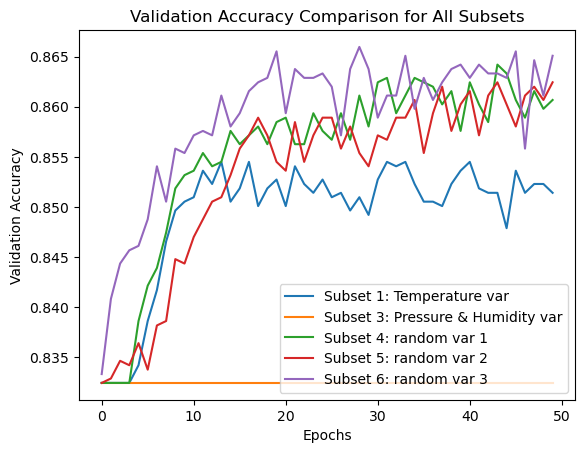

In [127]:
# plotting stuff
plt.plot(run_1.history['val_accuracy'], label='Subset 1: Temperature var ')
plt.plot(run_3.history['val_accuracy'], label='Subset 3: Pressure & Humidity var')
plt.plot(run_4.history['val_accuracy'], label='Subset 4: random var 1')
plt.plot(run_5.history['val_accuracy'], label='Subset 5: random var 2')
plt.plot(run_6.history['val_accuracy'], label='Subset 6: random var 3')

plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy Comparison for All Subsets')
plt.show()


In [128]:
# 3.3 (i)   Applying the same transformations to the test set as we did to the trng set
X_test_scaled = scaler.transform(X_test)

In [129]:
#3.3 (j)
# Predicting on the test set for each subset
y_pred_test = (model.predict(X_test_scaled) > 0.5).astype('int32')


71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [130]:
#3.3 (k)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)

# Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_test)
print("Balanced Accuracy:", balanced_acc)

# Precision
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)


Confusion Matrix:
 [[ 115  252]
 [  55 1846]]
Balanced Accuracy: 0.6422096788295849
Precision: 0.8798856053384175




Thus the model performs well on predicting droughts , but slightly average when predicting a no drought

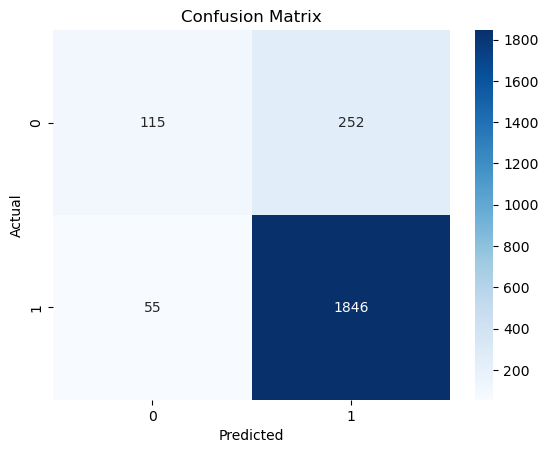

In [131]:
#3.3(k)
import seaborn as sns # type: ignore

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [132]:
model.save('classification_model.h5')


In [133]:
#5.1 (a)
data_1 = pd.read_csv("Climate_SPI1.csv")

In [134]:
#5.1 (b)
data_1['Drought'] = data['SPI'].apply(lambda x: 1 if x <= -1 else 0)

In [135]:
X_new = data_1.drop(columns=['year', 'grid_ID', 'SPI', 'Drought'])
y_new = data_1['Drought']


# # Converting month to numeric
# data_1['month'] = pd.to_numeric(data_1['month'], errors='coerce').copy()

# # Filling NaN values (for standard data pre processing just in-case )
# data_1['month'] = data_1['month'].fillna(1).astype(int)

# # 3.4 Additionally done altho we havent used month as a predictor here
# data_1['month_normalised'] = 2 * np.pi * (data_1['month'] - 1) / 12
# data_1['month_cos'] = np.cos(data['month_normalised'])
# data_1['month_sin'] = np.sin(data['month_normalised'])

# # Dropping month column
# data_1 = data_1.drop(columns=['month'])


In [136]:
#5.1 (c)
X_new_scaled = scaler.transform(X_new)

In [137]:
#5.1 (d)
model = load_model('classification_model.h5')

In [138]:
#  5.1 (e) Predict the class 'Drought' on the new data
y_pred_new = (model.predict(X_new_scaled) > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step


Confusion Matrix:
[[  99 1632]
 [   1  284]]
Balanced Accuracy: 0.526841801210131
Precision: 0.14822546972860126


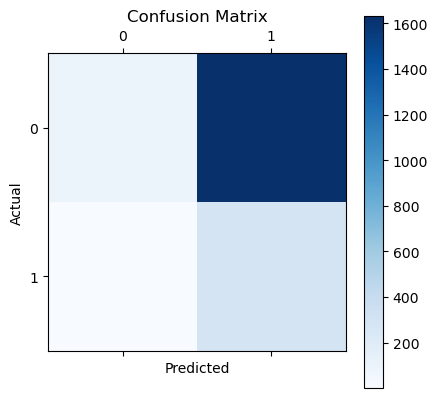

In [139]:
# 5.1 (f) Computin and plotting the confusion matrix
conf_matrix_new = confusion_matrix(y_new, y_pred_new)

# 5.1 (g) Calculating Balanced Accuracy and Precision
balanced_acc_new = balanced_accuracy_score(y_new, y_pred_new)
precision_new = precision_score(y_new, y_pred_new)

# Printing the results
print("Confusion Matrix:")
print(conf_matrix_new)
print(f"Balanced Accuracy: {balanced_acc_new}")
print(f"Precision: {precision_new}")

# Plotting the confusion matrix
plt.matshow(conf_matrix_new, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [140]:
# 5.1 (h) 
print(f"Number of samples in the new dataset: {X_new.shape[0]}")

print(f"Model's predictors: {list(X_new.columns)}")


Number of samples in the new dataset: 2016
Model's predictors: ['month', 'u10', 'v10', 'mx2t', 'mn2t', 'tcc', 't2', 'msl', 't', 'q', 'u', 'v', 'z']
